## Dataset split using `os.symlink()`

When working with large datasets consisting of separate files, we can manage dataset splits with symbolic links, essentially creating shortcuts to original files according to a desired split ratio.

The advantage is we don't need to copy or move files around, as these operations require extra computation and memory usage.  

In [1]:
import os

print(os.getcwd())

datapath = "images/"

c:\Users\tomas\Desktop\ip102_v1.1


In [2]:
# read category from filename
filename = "0_00213.jpg"
category = filename.split("_")[0]
print(category)

0


In [4]:
# read in `classes.txt.txt` with proper class names into a dict.
# these could do with a bit of sanitation.
labels = {}

with open('classes.txt.txt') as f:
    for line in f:
        # remove lead/trailing whitespace 
        stripped = line.strip()
        # collect the parts of the names together with *
        head, *rest = stripped.split()

        # we can do -1 here since our images are classed 0-101
        key = int(head) -1
        
        val = rest
        # join the names with an underscore
        labels[key] = '_'.join(val)

labels

{0: 'rice_leaf_roller',
 1: 'rice_leaf_caterpillar',
 2: 'paddy_stem_maggot',
 3: 'asiatic_rice_borer',
 4: 'yellow_rice_borer',
 5: 'rice_gall_midge',
 6: 'Rice_Stemfly',
 7: 'brown_plant_hopper',
 8: 'white_backed_plant_hopper',
 9: 'small_brown_plant_hopper',
 10: 'rice_water_weevil',
 11: 'rice_leafhopper',
 12: 'grain_spreader_thrips',
 13: 'rice_shell_pest',
 14: 'grub',
 15: 'mole_cricket',
 16: 'wireworm',
 17: 'white_margined_moth',
 18: 'black_cutworm',
 19: 'large_cutworm',
 20: 'yellow_cutworm',
 21: 'red_spider',
 22: 'corn_borer',
 23: 'army_worm',
 24: 'aphids',
 25: 'Potosiabre_vitarsis',
 26: 'peach_borer',
 27: 'english_grain_aphid',
 28: 'green_bug',
 29: 'bird_cherry-oataphid',
 30: 'wheat_blossom_midge',
 31: 'penthaleus_major',
 32: 'longlegged_spider_mite',
 33: 'wheat_phloeothrips',
 34: 'wheat_sawfly',
 35: 'cerodonta_denticornis',
 36: 'beet_fly',
 37: 'flea_beetle',
 38: 'cabbage_army_worm',
 39: 'beet_army_worm',
 40: 'Beet_spot_flies',
 41: 'meadow_moth',
 

In [5]:
# alternatively the dictionary comprehension way
with open("classes.txt.txt") as f:
    a = {int(k)-1: '_'.join(v.split()) for line in f for (k,v) in [line.strip().split(None, 1)]}
a

{0: 'rice_leaf_roller',
 1: 'rice_leaf_caterpillar',
 2: 'paddy_stem_maggot',
 3: 'asiatic_rice_borer',
 4: 'yellow_rice_borer',
 5: 'rice_gall_midge',
 6: 'Rice_Stemfly',
 7: 'brown_plant_hopper',
 8: 'white_backed_plant_hopper',
 9: 'small_brown_plant_hopper',
 10: 'rice_water_weevil',
 11: 'rice_leafhopper',
 12: 'grain_spreader_thrips',
 13: 'rice_shell_pest',
 14: 'grub',
 15: 'mole_cricket',
 16: 'wireworm',
 17: 'white_margined_moth',
 18: 'black_cutworm',
 19: 'large_cutworm',
 20: 'yellow_cutworm',
 21: 'red_spider',
 22: 'corn_borer',
 23: 'army_worm',
 24: 'aphids',
 25: 'Potosiabre_vitarsis',
 26: 'peach_borer',
 27: 'english_grain_aphid',
 28: 'green_bug',
 29: 'bird_cherry-oataphid',
 30: 'wheat_blossom_midge',
 31: 'penthaleus_major',
 32: 'longlegged_spider_mite',
 33: 'wheat_phloeothrips',
 34: 'wheat_sawfly',
 35: 'cerodonta_denticornis',
 36: 'beet_fly',
 37: 'flea_beetle',
 38: 'cabbage_army_worm',
 39: 'beet_army_worm',
 40: 'Beet_spot_flies',
 41: 'meadow_moth',
 

In [6]:
# create folder structure to hold split sets
dataset = "split/"
#os.mkdir(dataset)

dirs = ["train", "test", "val"]

train_path = os.path.join(dataset, "train")
val_path = os.path.join(dataset, "val")
test_path = os.path.join(dataset, "test")

##os.mkdir(train_path)
#os.mkdir(val_path)
#os.mkdir(test_path)

- Make folders for each class in each dataset folder
- read in the original train/val/test split csvs
- using `os.symlink()`, add links to original files in corresponding class folder in each dataset folder

## test making a symlink in a class folder

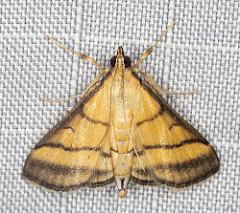

In [7]:
# show OG image
from PIL import Image
from pathlib import Path

src = os.path.join(datapath, "0_00005.jpg")
img = Image.open(src)
img

In [8]:

label_index = int(img.filename.split('/')[1].split('_')[0])
img_filename_only = img.filename.split('/')[1]

labelname = labels[label_index]

dest_folder_path = os.path.join(train_path, labelname)
print(train_path)

link_path = os.path.join(dest_folder_path, img_filename_only)
link_path = os.path.abspath(link_path)
src_abs = os.path.abspath(src)

# absolute paths for src and dest
os.symlink(src_abs, link_path)

split/train


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'c:\\Users\\tomas\\Desktop\\ip102_v1.1\\images\\0_00005.jpg' -> 'c:\\Users\\tomas\\Desktop\\ip102_v1.1\\split\\train\\rice_leaf_roller\\0_00005.jpg'

On Unix platforms, an absolute path begins with a forward slash (‘/’) and on Windows it begins with a backward slash (‘\’) after removing any potential drive letter. Can be checked with `os.path.isabs()` method.

In [9]:
# open image through symlink
print("link path: {}, is absolute: {}".format(link_path, os.path.isabs(link_path) ))
print(src_abs)

linked_img = Image.open(link_path)
linked_img

link path: c:\Users\tomas\Desktop\ip102_v1.1\split\train\rice_leaf_roller\0_00005.jpg, is absolute: True
c:\Users\tomas\Desktop\ip102_v1.1\images\0_00005.jpg


FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\tomas\\Desktop\\ip102_v1.1\\split\\train\\rice_leaf_roller\\0_00005.jpg'

In [60]:
print(img.filename[7:])


0_00005.jpg


functionalise

- check src is a file
- make dest directory, if not found
- phase folders are going to root folder (C:\)

In [18]:
dataset = "split/"
os.mkdir(dataset)

def create_link(src, phase):

    # check src
    if os.path.isfile(src):
        print('source exists')
        base_path = os.path.join(os.getcwd(), "split")

        print("base_path: ", base_path)
        
        
        # determine class index from filename
        head_tail = os.path.split(src)

        label_index = int(head_tail[1].split('_')[0])
        print(label_index)

        img_filename_only = head_tail[1]

        labelname = labels[label_index]
        print('class index of source: {}, labelname: {}'.format(label_index, labelname))
        phase_path = os.path.join(base_path,'/{}'.format(phase))
        print("phase path: '%s'" % phase_path)
        rel_phase_path = os.path.relpath(phase_path, dataset)
        print("relative phase path:", rel_phase_path)

        # if phase path doesn't exist, it needs to be made
        if not os.path.exists(rel_phase_path):
            print("making phase directory...")
            os.makedirs(rel_phase_path)

        dest_folder_path = os.path.join(rel_phase_path, labelname)
        rel_dest_folder_path = os.path.relpath(dest_folder_path, dataset)
        print("dest folder path: {}, is abs: {}".format(rel_dest_folder_path, os.path.isabs(rel_dest_folder_path)))

        # if destination folder doesn't exist, make it
        if not os.path.exists(rel_dest_folder_path):
             print("making class directory...")
             os.makedirs(rel_dest_folder_path)
        
        # create destination path
        link_path = os.path.join(rel_dest_folder_path, img_filename_only)
        link_path = os.path.relpath(link_path)
        print("link path:", link_path)
        
        # make link
        # test with print
        print(os.path.join(src,link_path))
        #os.symlink(src, link_path)
        

    else:
        print('src file not found')


create_link(src_abs, "train")

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'split/'